In [27]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.manifold import TSNE, MDS, LocallyLinearEmbedding
import matplotlib.pyplot as plt
import matplotlib as mlt

In [5]:
mnist = fetch_openml('mnist_784', as_frame=True)
X, y = mnist.data, mnist.target

In [6]:
X_train = X[60_000:]
y_train = y[60_000:]

X_test = X[:60_000]
y_test = y[:60_000]

# Q9

## Training Random Forest Classifier

In [ ]:
%%time

# Training RFC
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)

CPU times: total: 7.61 s
Wall time: 7.79 s


In [11]:
print(f"Accuracy = {accuracy_score(y_test, rf_clf.predict(X_test)) * 100:.3f}%")

Accuracy = 94.505%


### Applying PCA

In [12]:
pca = PCA(n_components= 0.95, random_state=42)
X_reduced = pca.fit_transform(X_train)

In [ ]:
%%time

rf_clf_pca = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_reduced, y_train)

CPU times: total: 16.9 s
Wall time: 17.1 s


In [14]:
X_test_reduced = pca.transform(X_test)
print(f"Accuracy with PCA = {accuracy_score(y_test, rf_clf_pca.predict(X_test_reduced)) * 100:.3f}%")

Accuracy with PCA = 92.017%


## Training SGDClassifier

In [19]:
%%time
sgdclf = SGDClassifier(random_state=42).fit(X_train, y_train)

CPU times: total: 13.4 s
Wall time: 13.7 s


In [20]:
%%time
sgdclf_pca = SGDClassifier(random_state=42).fit(X_reduced, y_train)

CPU times: total: 6.73 s
Wall time: 6.85 s


In [21]:
print(f"Accuracy with SGD = {accuracy_score(y_test, sgdclf.predict(X_test)) * 100:.3f}%")
print(f"Accuracy with SGD and PCA = {accuracy_score(y_test, sgdclf_pca.predict(X_test_reduced)) * 100:.3f}%")

Accuracy with SGD = 86.598%
Accuracy with SGD and PCA = 76.320%


# Q10

## Using t-SNE

C:\Users\abdoi\AppData\Local\Temp\ipykernel_26820\1133686582.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)


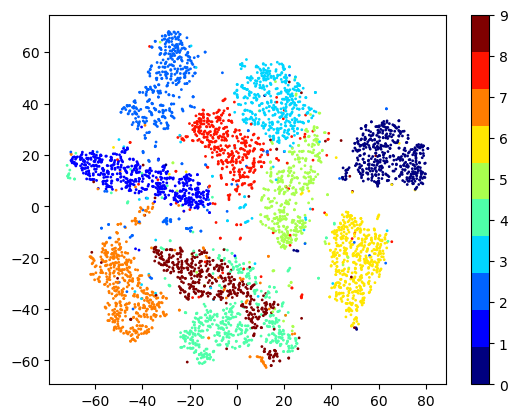

In [25]:
tsne = TSNE(n_components=2, random_state=42)
X_viz = X[:5000]
y_viz = y[:5000]
X_reduced = tsne.fit_transform(X_viz)
plt.Figure(figsize=(20, 20))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)
plt.colorbar(ticks=range(10))

## Using PCA

C:\Users\abdoi\AppData\Local\Temp\ipykernel_26820\2472221702.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)


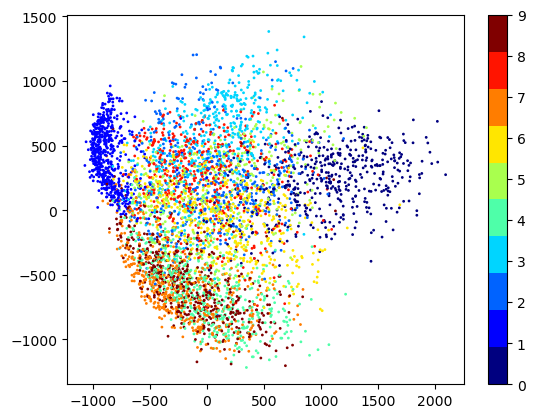

In [28]:
pca = PCA(n_components=2, random_state=42)
X_viz = X[:5000]
y_viz = y[:5000]
X_reduced = pca.fit_transform(X_viz)
plt.Figure(figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)
plt.colorbar(ticks=range(10))

## Using LLE

C:\Users\abdoi\AppData\Local\Temp\ipykernel_26820\3216031145.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)


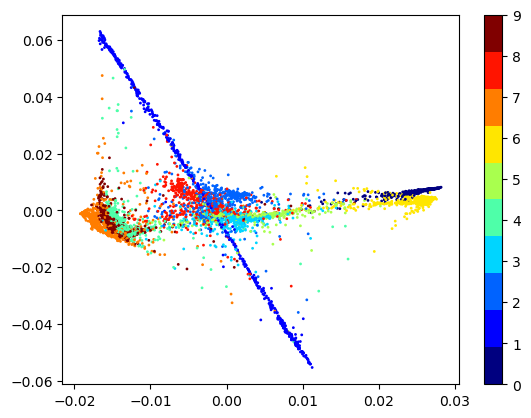

In [29]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors= 10, random_state=42)
X_viz = X[:5000]
y_viz = y[:5000]
X_reduced = lle.fit_transform(X_viz)
plt.Figure(figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_viz.astype(int), cmap=mlt.cm.get_cmap('jet', 10), s=1)
plt.colorbar(ticks=range(10))